enter value of n: 50
center line values
[0.02043268 0.05927637 0.09611814 0.1309796  0.16388571 0.19486599
 0.22395549 0.25119551 0.27663383 0.3003247  0.32232852 0.34271114
 0.36154313 0.37889874 0.39485495 0.40949042 0.42288445 0.4351161
 0.44626333 0.45640232 0.46560683 0.47394774 0.48149271 0.48830587
 0.49444772 0.49997501 0.50494074 0.50939419 0.51338106 0.51694353
 0.52012047 0.52294759 0.5254576  0.52768045 0.52964348 0.53137161
 0.53288757 0.53421202 0.53536375 0.53635986 0.53721587 0.53794588
 0.53856272 0.53907799 0.53950214 0.53984445 0.54011291 0.54031376
 0.54045074 0.54052334]
enter value of n: 10
center line values
[0.101612   0.2527947  0.35861416 0.42865345 0.47296306 0.49999564
 0.51594572 0.52498622 0.52979136 0.53202819]


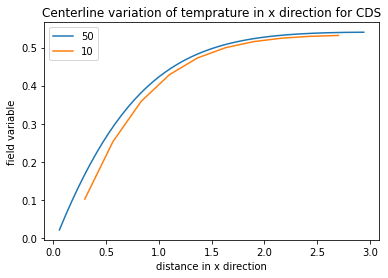

In [6]:
import numpy as np
import copy
from matplotlib import pyplot as plt

def Uvel(x):
    U = x**2+1
    return U
def Vvel(y):
    V = y**2+1
    return V
def Source(x,y):
    S = 2*(x+y)
    return S
k = 3
phis = 0.5
rho = 2
L = 3
for p in range(0,2):
    n = int(input('enter value of n: '))
    dx = L/n
    dy = L/n
    T0 = 0 ; T1 = 1
    X = np.linspace(0,L,n+1)
    Y = np.linspace(0,L,n+1)
    X1 = np.linspace(L/n,L-L/n,n)
    Tnew = np.zeros((n,n))
    Told = np.ones((n, n))

    # solving using CDS scheme
    while(abs(np.linalg.norm(Told-Tnew))>10**-5):   #for l in range(0,4000):
        Told = copy.deepcopy(Tnew)
        for j in range(0,n):
            for i in range(0,n):
                Fe = rho*Uvel(X[i+1])*dy ; De = (k*dy)/dx
                Fw = rho*Uvel(X[i])*dy ; Dw = (k*dy)/dx
                Fn = rho*Vvel(Y[j+1])*dx ; Dn = (k*dx)/dy
                Fs = rho*Vvel((Y[j]))*dx ; Ds = (k*dx)/dy
                ae = De-Fe/2; aw = Dw+Fw/2 ; an = Dn - Fn/2; aS = Ds+Fs/2; b = Source(X[j]+dx/2,Y[i]+dy/2)*dx*dy
                ap = ae+aw+an+aS + (Fe-Fw+Fn-Fs)
                # general equation for interior cells
                if (i == 0 and j == 0):
                    Tnew[j][i] = (ae*Tnew[j][i+1] + an*Tnew[j+1][i]+ (Fw+2*Dw)*T0 + (Fs+2*Ds)*T1+b)/(ae+an+2*Dw+2*Ds+Fe+Fn)
                elif (j == n-1 and (i!=0 and i!=n-1)):
                    Tnew[j][i] = (ae * Tnew[j][i + 1] + aS * Tnew[j - 1][i] + aw * Tnew[j][i-1] + b) / (ap - an)
                elif (i == n - 1 and (j!=0 and j!=n-1)):
                    Tnew[j][i] = (aw * Tnew[j][i - 1] + aS * Tnew[j - 1][i] + an * Tnew[j + 1][i] + b) / (ap - ae)
                elif (i == 0 and (j != 0 and j!= n-1)):
                    Tnew[j][i] = (ae * Tnew[j][i+1] + an * Tnew[j+1][i] + aS * Tnew[j-1][i] + (Fw + 2 * Dw) * T0+b) / (ae+an+aS+Fe+Fn-Fs+2*Dw)
                elif ((i != 0 and i!=n-1) and j == 0):
                    Tnew[j][i] = (ae * Tnew[j][i + 1] + an * Tnew[j + 1][i] + aw * Tnew[j][i - 1] + (Fs + 2 * Ds) * T1 + b) / (ae + an + aw + Fe + Fn - Fw + 2 * Ds)
                elif (i == n - 1 and j == n - 1):
                    Tnew[j][i] = (aw * Tnew[j][i - 1] + aS * Tnew[j - 1][i] + b) / (Fe + Fn + aw + aS - Fs - Fw)
                elif (i == n - 1 and j == 0):
                    Tnew[j][i] = (aw * Tnew[j][i - 1] + ((Fs + 2 * Ds) * T1) + an * Tnew[j + 1][i] + b) / (an+aw+Fe+2*Ds+Fn-Fw)
                elif (i == 0 and j == n - 1):
                    Tnew[j][i] = (ae*Tnew[j][i+1]+aS*Tnew[j-1][i]+(Fw+2*Dw)*T0+b)/(aS+ae+Fn+2*Dw+Fe-Fs)
                else:
                    Tnew[j][i] = (ae*Tnew[j][i+1]+aw*Tnew[j][i-1]+an*Tnew[j+1][i]+aS*Tnew[j-1][i]+b)/ap

    plt.plot(X1,Tnew[int((n+1)/2)],label = str(n))
    print('center line values')
    print(Tnew[int((n+1)/2)])
plt.xlabel('distance in x direction')
plt.ylabel('field variable')
plt.title('Centerline variation of temprature in x direction for CDS')
plt.legend()
plt.show()









enter value of n: 10
center line values for QUICK
enter value of n: 15
center line values for QUICK


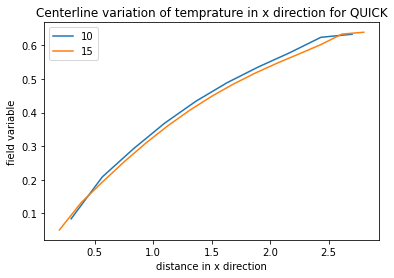

In [3]:
import numpy as np
import copy
from matplotlib import pyplot as plt

def Uvel(x):
    U = x**2+1
    return U
def Vvel(y):
    V = y**2+1
    return V
def Source(x,y):
    S = 2*(x+y)
    return S
k = 3
phis = 0.5
rho = 2
L = 3
for p in range(0,2):
    n = int(input('enter value of n: '))
    dx = L/n
    dy = L/n
    T0 = 0 ; T1 = 1
    X = np.linspace(0,L,n+1)
    Y = np.linspace(0,L,n+1)
    X1 = np.linspace(L/n,L-L/n,n)
    Tnew = np.zeros((n,n))
    Told = np.ones((n, n))

    # Solving using QUICK scheme
    while(abs(np.linalg.norm(Told-Tnew))>10**-6):
        Told = copy.deepcopy(Tnew)
        for j in range(0,n):
            for i in range(0,n):
                Fe = rho*Uvel(X[j+1])*dy ; De = (k*dy)/dx
                Fw = rho*Uvel(X[j])*dy ; Dw = (k*dy)/dx
                Fn = rho*Vvel(Y[i+1])*dx ; Dn = (k*dx)/dy
                Fs = rho*Vvel((Y[i]))*dx ; Ds = (k*dx)/dy
                b = Source(X[j]+dx/2,Y[i]+dy/2)*dx*dy
                if(j==0):
                    if(i==0):
                        ae = De+max(-Fe,0); aw = 0 ; aS = 0; an = Dn -max(-Fn,0); ap =(ae+2*Dw+2*Ds+an+Fe-Fw+Fn-Fs);S = b+(Fs+2*Ds)*T1+(Fw+2*Dw)*T0
                        Tnew[j][i] = (ae * Tnew[j][i + 1] +an * Tnew[j + 1][i]  + S) / ap
                    elif(i==n-1):
                        ae = 0; aw = Dw+max(Fw,0) ; an = Dn -max(-Fn,0); aS = 0 ; ap =(aw+an+Fe+2*Ds+Fn-Fw); S = b+(2*Ds+Fs)*T1;
                        Tnew[j][i] = (aw * Tnew[j][i - 1] + an * Tnew[j + 1][i]+  S) / ap
                    else:
                        ae = De+max(-Fe,0);aw = Dw+max(Fw,0); an = Dn -max(-Fn,0); aS = 0 ; ap =(aw+an+ae+2*Ds+Fe-Fw+Fn);S= b+(2*Ds+Fs)*T1
                        Tnew[j][i] = (ae * Tnew[j][i + 1] + aw * Tnew[j][i - 1] + an * Tnew[j + 1][i] + S) / ap
                elif(j==1):
                    if(i!=0 and i!=n-1):
                        ae = De+max(-Fe,0);aw = Dw+max(Fw,0); an = Dn -max(-Fn,0); aS = Ds+max(Fs,0); ap = ae+aw+an+aS+(Fe-Fw+Fn-Fs);S=b
                        Tnew[j][i] = (ae * Tnew[j][i + 1] + aw * Tnew[j][i - 1] + an * Tnew[j + 1][i] + aS * Tnew[j - 1][i] + S) / ap
                if(j==n-1):
                    if(i==0):
                        ae = De + max(-Fe, 0);aw=0;aS = Ds+max(Fs,0);an = 0;ap = ae+aS+2*Dw+Fe-Fs+Fn;S=b+(2*Dw+Fw)*T0;
                        Tnew[j][i] = (ae * Tnew[j][i + 1]  + aS * Tnew[j - 1][i] + S) / ap
                    if(i==n-1):
                        ae = 0;aw = Dw+max(Fw,0) ;aS = Ds + max(Fs, 0);an = 0;ap = aw + aS + Fe-Fw-Fs+Fn;S = b + (2 * Dw + Fw) * T0;
                        Tnew[j][i] = ( aw * Tnew[j][i - 1] + aS * Tnew[j - 1][i] + S) / ap
                    else:
                        ae = De + max(-Fe, 0);aw = Dw + max(Fw, 0);an = 0;aS =Ds + max(Fs, 0) ;ap = (aw + aS + ae+an + Fe - Fw + Fn-Fs);S = b;
                        Tnew[j][i] = (ae * Tnew[j][i + 1] + aw * Tnew[j][i - 1]  + aS * Tnew[j - 1][i] + S) / ap
                elif(j==n-2):
                    if(i!=0 and i!=n-1):
                        ae = De + max(-Fe, 0);aw = Dw + max(Fw, 0);an = Dn - max(-Fn, 0);aS = Ds + max(Fs, 0);ap = ae + aw + an + aS + (Fe - Fw + Fn - Fs);S = b
                        Tnew[j][i] = (ae * Tnew[j][i + 1] + aw * Tnew[j][i - 1] + an * Tnew[j + 1][i] + aS * Tnew[j - 1][i] + S) / ap
                if(j!=0 and j!=n-1):
                    if(i==0):
                        ae = De + max(-Fe, 0);aw=0;an = Dn - max(-Fn, 0);aS = Ds + max(Fs, 0);ap = ae+aS+an+2*Dw+Fe-Fs+Fn; S = b+(2*Dw+Fw)*T0
                        Tnew[j][i] = (ae * Tnew[j][i + 1] + an * Tnew[j + 1][i] + aS * Tnew[j - 1][i] + S) / ap
                    elif(i==n-1):
                        ae = 0; aw = Dw + max(Fw, 0);an = Dn - max(-Fn, 0);aS =  Ds + max(Fs, 0);ap = aS+an+aw+Fe-Fw+Fn-Fs; S = b
                        Tnew[j][i] = ( aw * Tnew[j][i - 1] + an * Tnew[j + 1][i] + aS * Tnew[j - 1][i] + S) / ap
                    elif(i==1):
                        ae = De + max(-Fe, 0);aw = Dw + max(Fw, 0);an = 0;aS = Ds + max(Fs, 0);ap = (aw + aS +an + ae + Fe - Fw + Fn - Fs);S = b;
                        Tnew[j][i] = (ae * Tnew[j][i + 1] + aw * Tnew[j][i - 1] + an * Tnew[j + 1][i] + aS * Tnew[j - 1][i] + S) / ap
                    elif(i==n-2):
                        ae = De + max(-Fe, 0);aw = Dw + max(Fw, 0);an = 0;aS = Ds + max(Fs, 0);ap = (aw + aS + ae+an + Fe - Fw + Fn - Fs);S = b;
                        Tnew[j][i] = (ae * Tnew[j][i + 1] + aw * Tnew[j][i - 1] + an * Tnew[j + 1][i] + aS * Tnew[j - 1][i] + S) / ap
                    else:
                        ae = De + max(-Fe, 0);aw = Dw + max(Fw, 0);an = Dn;aS = Ds + max(Fs, 0);ap = (aw + aS + ae+ an + Fe - Fw + Fn - Fs);
                        S = b+Fw*((Tnew[j][i]-Tnew[j][i-2])/4+(Tnew[j][i]+Tnew[j][i-2]-2*Tnew[j][i-1])/8)-Fe*((Tnew[j][i+1]-Tnew[j][i-2])/4+(Tnew[j][i+1]+Tnew[j][i-1]-2*Tnew[j][i])/8)+Fs*((Tnew[j][i]-Tnew[j-2][i])/4+(Tnew[j][i]+Tnew[j-2][i]-2*Tnew[j-1][i])/8)-Fn*((Tnew[j+1][i]-Tnew[j-1][i])/4+(Tnew[j-1][i]+Tnew[j+1][i]-2*Tnew[j][i])/8);
                        Tnew[j][i] = (ae * Tnew[j][i + 1] + aw * Tnew[j][i - 1] + an * Tnew[j + 1][i] + aS * Tnew[j - 1][i] + S) / ap
    
    
    plt.plot(X1,Tnew[int((n+1)/2)],label = str(n))
    print('center line values for QUICK')
    #print(Tnew[int((n+1)/2)])
plt.xlabel('distance in x direction')
plt.ylabel('field variable')
plt.title('Centerline variation of temprature in x direction for QUICK')
plt.legend()
plt.show()
